<a href="https://colab.research.google.com/github/riddhi-jain/Way-to-Machine-Learning/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("haberman.csv")
data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [ ]:
data.shape

(305, 4)

In [ ]:
data.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [ ]:
data['status'].value_counts()
# this data is not balanced (i.e. 50%- 50%)

1    225
2     80
Name: status, dtype: int64

In [ ]:
# checking misisng values using isnull()
data.isnull().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

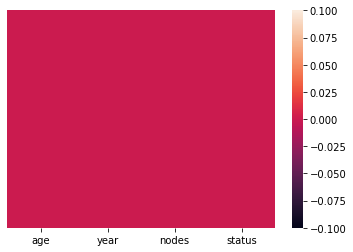

In [ ]:
# checking missing value with heatmap
sns.heatmap(data.isnull(), yticklabels= False);

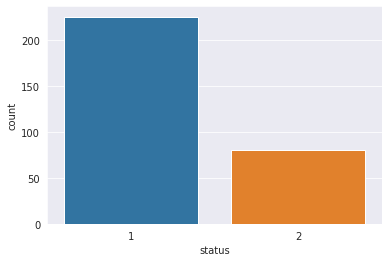

In [ ]:
sns.set_style('darkgrid')
# countplot gives count of values in a particular column
sns.countplot(x = 'status', data = data);

In [ ]:
data.describe()

,age,year,nodes,status
count,305.000000,305.000000,305.000000,305.000000
mean,52.357377,62.868852,4.032787,1.262295
std,10.678010,3.242783,7.200528,0.440605
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.000000,66.000000,4.000000,2.000000
max,78.000000,69.000000,52.000000,2.000000


# Handling Outliers
there are outliers in column 'nodes'

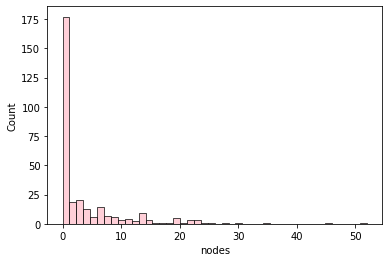

In [24]:
# checking thresholds for outliers via plotting a histogram
sns.histplot(data= data['nodes'], color = 'pink');

In [56]:
max_threshold = data['nodes'].quantile(0.92)
max_threshold

14.680000000000007

In [57]:
data[data['nodes']>max_threshold].shape

(25, 4)

In [45]:
data['nodes'].value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      3
2      0
3      2
4      4
      ..
300    0
301    1
302    0
303    3
304    1
Name: nodes, Length: 305, dtype: int64>

In [46]:
min_threshold = data['nodes'].quantile(0.45)
min_threshold

1.0

In [47]:
data[data['nodes'] < min_threshold].shape

(136, 4)

In [58]:
new_data = data[(data['nodes']> min_threshold) & (data['nodes']< max_threshold)]
new_data.shape

(103, 4)

# Univariate Analysis

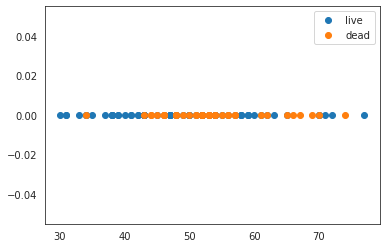

In [59]:
live = new_data.loc[new_data['status'] == 1]
dead = new_data.loc[new_data['status'] == 2]

sns.set_style('white')
plt.plot(live['age'],np.zeros_like(live['age']),'o')
plt.plot(dead['age'],np.zeros_like(dead['age']),'o')
plt.legend(['live','dead'])
plt.show();

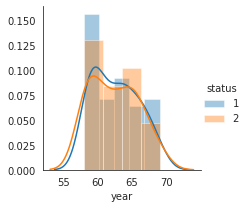

In [60]:
sns.FacetGrid(new_data, hue='status').map(sns.distplot,'year').add_legend()  
plt.show()

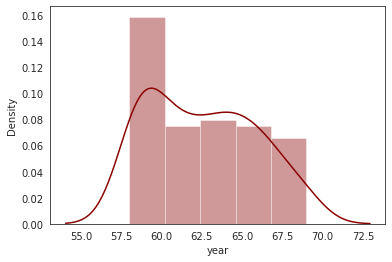

In [61]:
sns.distplot(new_data['year'], color= 'darkred');

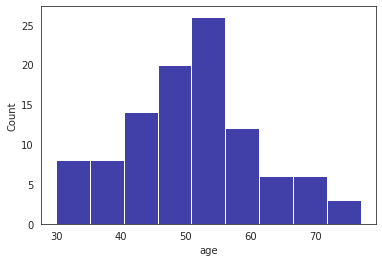

In [62]:
sns.histplot(new_data['age'], color ='darkblue');

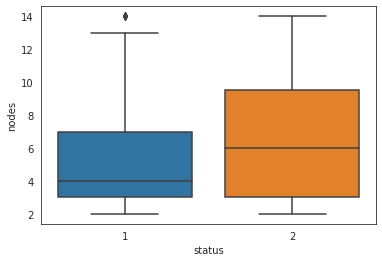

In [63]:
sns.boxplot(x = 'status', y = 'nodes', data= new_data);

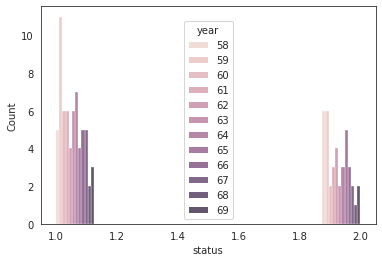

In [64]:
sns.histplot(data=new_data, x="status", hue="year", multiple="dodge", shrink=1);

# Bivariate Analysis

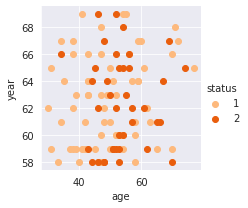

In [65]:
# 2-D plot for representation of data in two variables
sns.set_style(style= 'darkgrid')
sns.FacetGrid(new_data, hue = 'status', palette= 'Oranges').map(plt.scatter,'age','year').add_legend();

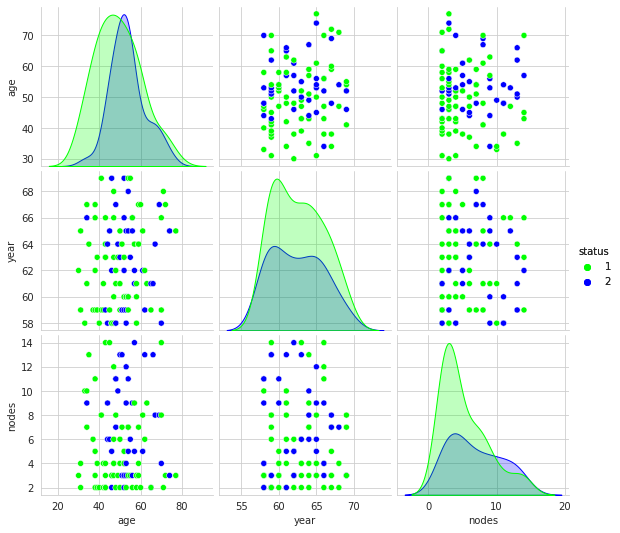

In [66]:
# 2-D plots for all combination of pairs 
sns.set_style(style= 'whitegrid')
sns.pairplot(new_data, hue="status", vars=['age','year','nodes'], palette='brg_r').add_legend();